# MARKET MIX MODELING
## -MINAKSHI SAHA

## Market Mix Modeling (MMM) is a technique which helps in quantifying the impact of several marketing inputs on sales.  It uses historic information,to quantify the sales impact of various marketing activities. This analysis tells  the incremental gain in sales that can be obtained by increasing the respective marketing element by one unit. If detailed spend information per activity is available then it is possible to calculate the Return on Investment of the marketing activity. This is also useful for reporting the historical effectiveness of the activity, it also helps in optimizing the marketing budget by identifying the most and least efficient marketing activities.

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_now = pd.read_csv(
'/content/drive/MyDrive/Colab Notebooks/capstone project/final_data.csv',
     parse_dates=['Date'],
     index_col='Date'
 )

In [ ]:
data_now

,TV,Radio,Influencer,Social_Media_1,Sales_1
Date,,,,,
2050-09-18,51,15.570826,Mega,4.861424,356.904878
2054-06-07,77,30.775450,Micro,4.034947,471.730044
2056-04-16,44,15.287639,Mega,4.599077,337.635921
2018-02-04,15,8.437408,Micro,1.546598,222.418978
2024-02-04,79,19.155844,Macro,0.016183,482.191836
...,...,...,...,...,...
2068-07-15,63,21.846359,Micro,2.552692,347.966481
2039-06-19,21,5.757883,Nano,0.136094,196.461884
2033-06-26,74,26.695449,Mega,5.945023,383.470533


So, we have some data (4552) on investment in advertising on different channels (like TV, Radio, Social Media) with sales values over a period of time(weekly basis). 

In [ ]:
# checking null values
data_now.isnull().sum()

TV                0
Radio             0
Influencer        0
Social_Media_1    0
Sales_1           0
dtype: int64

As, we have no null values , we procced with computation process.

### At first we are computing some descriptive statistics like mean, median(50th percentile),standard deviation, count etc. to understand the available dataset.

In [ ]:
data_now.describe()

,TV,Radio,Social_Media_1,Sales_1
count,4552.000000,4552.000000,4552.000000,4552.000000
mean,54.061731,17.138410,3.279153,339.450505
std,26.113084,9.166450,2.208758,106.068051
min,10.000000,0.000684,0.000034,108.430812
25%,32.000000,9.846842,1.499020,251.184676
50%,53.000000,16.791769,2.986347,333.793235
75%,77.000000,24.191319,4.709375,422.617795
max,100.000000,48.871161,13.160766,582.740161


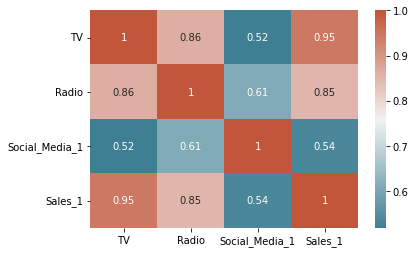

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data_now.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Comment:

### From the above, we can say that TV advertising has an high impact on sales follows by radio. But Social Media advertising has very small impact on sales.

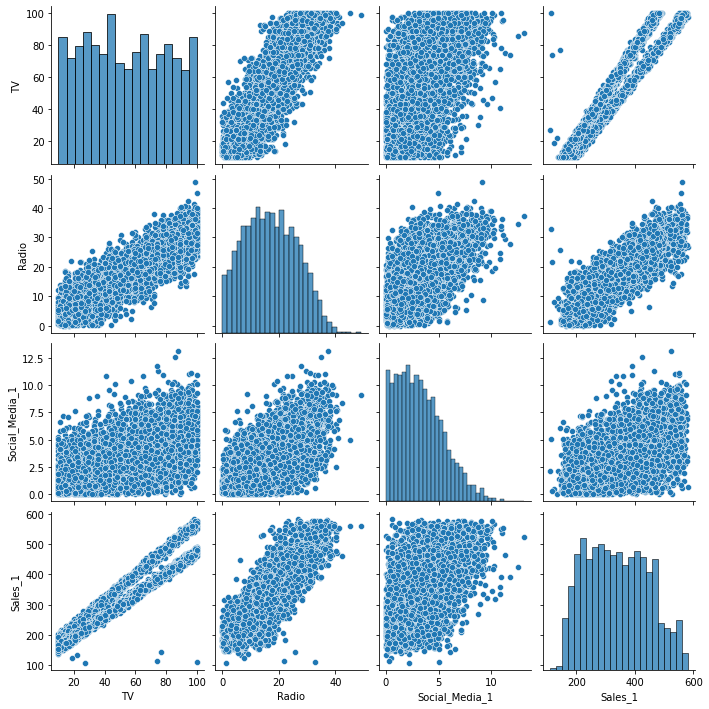

In [ ]:
sns.pairplot(data_now)

## Comment:
the pair plot is also indicating that Tv advertising has high impact on sales.

## Linear Regression:
now, we are going to use Linear regression to see the relationship between advertising in diiferent channels and sales . We also want to predict sales on the basis of investment in different channels.

In [ ]:
X = data_now.drop(columns=['Sales_1','Influencer'])
y = data_now['Sales_1']
lr = LinearRegression()
print(cross_val_score(lr, X, y, cv=TimeSeriesSplit()))      # returns RMSE of 5 split out of 6

[0.99426431 0.8561162  0.64370454 0.76118537 0.86779278]


In [ ]:
lr.fit(X, y)                                      # fit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [3.3616934  1.32572795 1.76633682]
Intercept: 129.19858367985867


###Date         TV   Radio  Influencer Social_Media_1 Sales_1
####2054-06-07	77	30.775450	Micro   	4.034947	   471.730044

In [ ]:
print(lr.predict(([[77.0, 30.775450, 4.034947]])))

[435.97592527]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
## Fitting OLS

import statsmodels.formula.api as sm
model = sm.ols(formula="Sales_1~TV+Radio+Social_Media_1", data=data_now).fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                Sales_1   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 1.362e+04
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        05:43:01   Log-Likelihood:                -22453.
No. Observations:                4552   AIC:                         4.491e+04
Df Residuals:                    4548   BIC:                         4.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        129.1986      1.169    110.

## Comment:
### As, the P-values are <0.05 infact all are zeros , we can say that each and every channel advertisement has an impact on sales. R-sq value=0.90 indicating 90% variation in sales can be explained by the model.

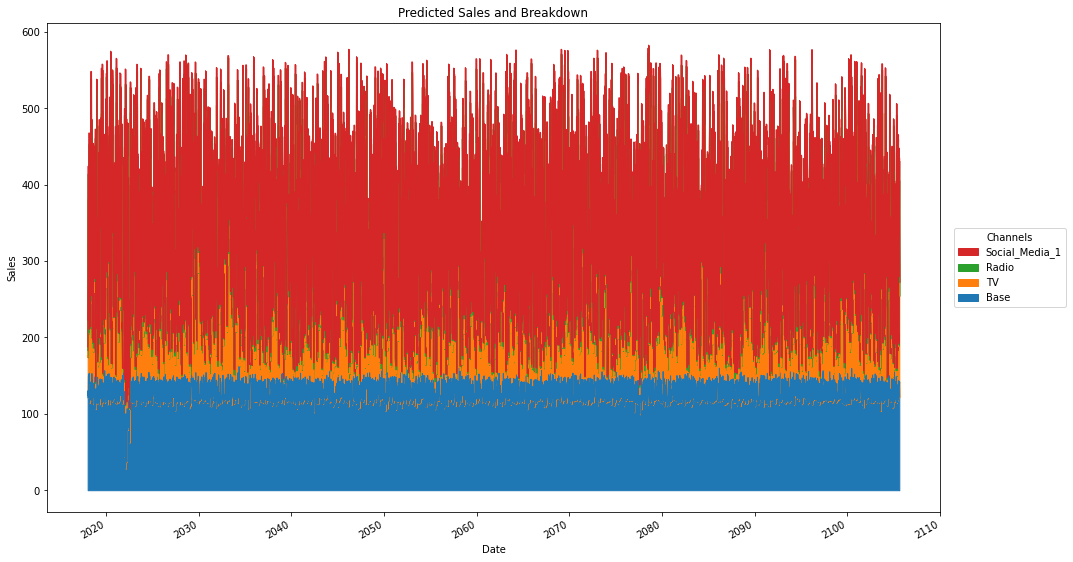

In [ ]:
# Predicted Sales vs date plot
X2 = data_now.loc[:, ('TV', 'Radio', "Social_Media_1")]
y2 = data_now['Sales_1']

lr2 = LinearRegression()
lr2.fit(X2, y2)
weights = pd.Series(
    lr2.coef_,
    index=X2.columns
)
base = lr2.intercept_
unadj_contributions = X2.mul(weights).assign(Base=base)   ## mul() function return multiplication of dataframe and other element- wise. This function provides an additional support to handle missing values in one of the inputs.
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y2, axis=0)
                    ) # contains all contributions for each day
ax = (adj_contributions[['Base', 'TV', 'Radio', 'Social_Media_1']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

### Comment:
#### From the above Area plot we are able to understand how the sales is changing  on basis of investment in different channels on weekly basis.

### now, we want to see whether there is any interaction effect.

In [ ]:
## Model with Interaction effect

from sklearn.preprocessing import PolynomialFeatures
from statsmodels.regression import linear_model

# Selecting X
X12 = X2.copy()
y12 = y2.copy()
y12 = list(y12)

# generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X12)

#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['TV','Radio','Social_Media_1',
                                                        'TV:Radio','TV:Social_Media_1','Radio:Social_Media_1'
                                                        ])

# Creating a linear model and fitting the DataFrame
interaction_model = linear_model.OLS(y12, interaction_df).fit()

# Checking p-values
print("P-values:",interaction_model.pvalues[interaction_model.pvalues < 0.05])



P-values: TV                       0.000000e+00
Radio                    9.107934e-50
Social_Media_1           3.210856e-61
TV:Radio                1.765830e-130
TV:Social_Media_1        3.524406e-42
Radio:Social_Media_1     3.082651e-11
dtype: float64


### Comment:
#### As, all p-values are <0.05 , we conclude that interaction effect is present. that means we have to invest for advertisement in all channels. 

Note:
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.A decision tree combines some decisions, whereas a random forest combines several decision trees.

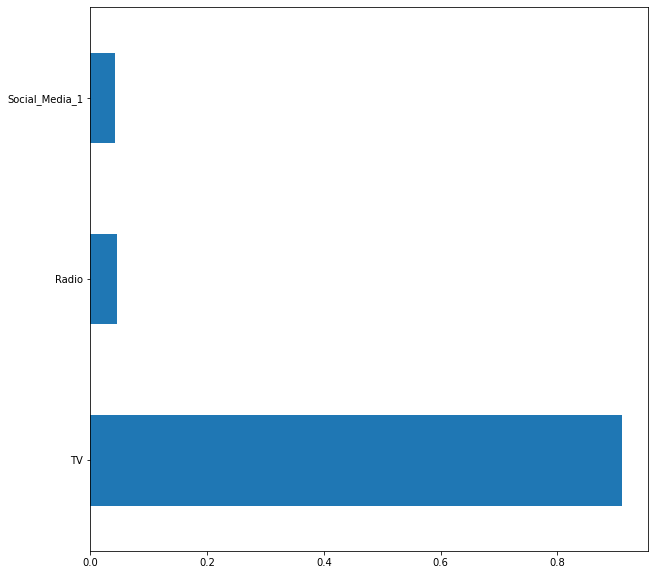

In [ ]:
## Feature Importance
# Setting X and y variables
X3=X2.copy()
Y3=y2.copy()


# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor                        
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X1_train, X1_test, y1_train, y1_test = train_test_split(X3, Y3, test_size=.25, random_state=0)    ## keep the results reproducible
model = RandomForestRegressor(random_state=1)
model.fit(X1_train, y1_train)
pred = model.predict(X1_test)


# Visualizing Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X3.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

## Comment:
From the above graph, we are concluding that TV investment has greatest impact on sales.

In [ ]:
feat_importances

TV                0.910366
Radio             0.046547
Social_Media_1    0.043087
dtype: float64

## Comment:
#### This output also indicates that tv investment has great importance on sales... 

#### As our data has a categorical variable (Influencer) so now we are doing dummy variable regression...

In [ ]:
# Dummy variable for Influencer
infl=pd.get_dummies(data_now.Influencer)
# Binding it back to the orignal dataset and dropping categorical variable Influencer
dummy_data=pd.concat([data_now,infl], axis=1)
dummy_data.drop('Influencer',inplace=True,axis=1)    ## Using the inplace=True keyword in a pandas method changes the default behaviour such that the operation on the dataframe doesn't return anything, it instead 'modifies the underlying data' (more on that later). It mutates the actual object which you apply it to.
dummy_data

,TV,Radio,Social_Media_1,Sales_1,Macro,Mega,Micro,Nano
Date,,,,,,,,
2050-09-18,51,15.570826,4.861424,356.904878,0,1,0,0
2054-06-07,77,30.775450,4.034947,471.730044,0,0,1,0
2056-04-16,44,15.287639,4.599077,337.635921,0,1,0,0
2018-02-04,15,8.437408,1.546598,222.418978,0,0,1,0
2024-02-04,79,19.155844,0.016183,482.191836,1,0,0,0
...,...,...,...,...,...,...,...,...
2068-07-15,63,21.846359,2.552692,347.966481,0,0,1,0
2039-06-19,21,5.757883,0.136094,196.461884,0,0,0,1
2033-06-26,74,26.695449,5.945023,383.470533,0,1,0,0


In [ ]:
X5 = dummy_data.loc[:, dummy_data.columns != 'Sales_1']
y5 = dummy_data['Sales_1']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X5, y5 ,test_size=0.35, random_state=101) 


In [ ]:
from sklearn.linear_model import LinearRegression
# Initializing the Linear Regression model
lm = LinearRegression()
# Fitting the model to the train set
lm.fit(X_train,y_train)
# print the intercept
print(lm.intercept_)
# Print coeffs
coeff_df = pd.DataFrame(lm.coef_,X5.columns,columns=['Coefficient'])
print(coeff_df)

128.7202987381338
                Coefficient
TV                 3.370605
Radio              1.283133
Social_Media_1     1.866260
Macro              0.388119
Mega               0.536741
Micro              0.232325
Nano              -1.157185


In [ ]:
## Model Accuracy with Dummy variable regression
lm.score(X_train,y_train)

0.9017393087219645

[238.91618288 360.42055954 310.73697887 ... 414.47322249 319.04353685
 360.65785325]


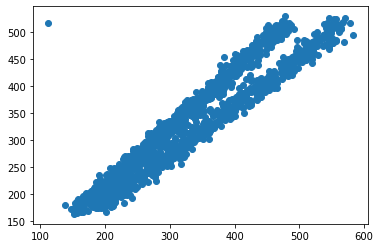

In [ ]:
# Predicting Sales for the test set
y_pred = lm.predict(X_test)
print(y_pred)
# Plotting predicted values vs actual values available for the test set
plt.scatter(y_test,y_pred)

In [ ]:
# Evaluating the Model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Square',metrics.r2_score(y_test,y_pred))

MAE: 28.8473283831242
MSE: 1128.450695371412
RMSE: 33.59242020711535
R-Square 0.8960974403530562


1. R-square:
RSquare of 0.896 implies that the independent variables i.e. the spending across the channels are able to successfully explain 89.6% of the variability seen in Sales across the dataset.

Now, we want to see whether there is any saturation effect and carry over effect ...so we are going to apply addstock effect 

In [ ]:
## Add Stock
### Saturation Effect
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array
class ExponentialSaturation(BaseEstimator, TransformerMixin):           ## a custom transformer is an estimator and a transformer, so we will create a class that inherits from both BaseEstimator and TransformerMixin. It is a good practice to initialize it with super().__init__(). By inheriting, we get a standard method such as get_params and set_params for free. In the init, we also want to create the model parameter or parameters we want to learn.
    def __init__(self, a=1.):
        self.a = a
        
    def fit(self, X, y=None):
        X = check_array(X)              # Input object to check / convert.
        self._check_n_features(X, reset=True) # from BaseEstimator
        return self
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False) # from BaseEstimator
        return 1 - np.exp(-self.a*X)

In [ ]:
from scipy.signal import convolve2d
import numpy as np
class ExponentialCarryover(BaseEstimator, TransformerMixin):
    def __init__(self, strength=0.5, length=1):                  ## the class takes strength and length
        self.strength = strength
        self.length = length
    def fit(self, X, y=None):
        X = check_array(X)
        self._check_n_features(X, reset=True)                   ## creating a sliding window
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        return self
    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
        return convolution

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
adstock = ColumnTransformer(
    [                                                                       ## The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
     ('tv_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),           ## apply the pipeline to the column Tv and name this part tv_pipe
                           ('saturation', ExponentialSaturation())
     ]), ['TV']),
     ('radio_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Radio']),
     ('Social_Media_1_pipe', Pipeline([
                           ('carryover', ExponentialCarryover()),
                           ('saturation', ExponentialSaturation())
     ]), ['Social_Media_1']),
    ],
    remainder='passthrough'
)
model_new = Pipeline([
                  ('adstock', adstock),
                  ('regression', LinearRegression())
])


In [ ]:
X4=X3.copy()
Y4=Y3.copy()

In [ ]:
model_new.fit(X4,Y4)

Pipeline(steps=[('adstock',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tv_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                                  ['TV']),
                                                 ('radio_pipe',
                                                  Pipeline(steps=[('carryover',
                                                                   ExponentialCarryover()),
                                                                  ('saturation',
                                                                   ExponentialSaturation())]),
                                

In [ ]:
! pip install optuna

     |████████████████████████████████| 308 kB 6.5 MB/s 
     |████████████████████████████████| 81 kB 9.7 MB/s 
     |████████████████████████████████| 210 kB 48.4 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 113 kB 65.8 MB/s 
     |████████████████████████████████| 150 kB 70.1 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=11cf133fd37c6fefa5be99d5d73ade76a947fe17180c91826bc0934a60f6e878
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna as optuna                                       ## using optuna for optimizing the model
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution
tuned_model_new = OptunaSearchCV(
    estimator=model_new,
    param_distributions={                                     ## optimizing the model by using all the specified parameters
        'adstock__tv_pipe__carryover__strength': UniformDistribution(0, 1),  ## taking float parameters between 0 and 1
        'adstock__tv_pipe__carryover__length': IntUniformDistribution(0, 6), ## taking integers values between 0 and 6...telling the model to only consider carryover length is less or equal to 6 weeks
        'adstock__tv_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__radio_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__radio_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__radio_pipe__saturation__a': UniformDistribution(0, 0.01),
        'adstock__Social_Media_1_pipe__carryover__strength': UniformDistribution(0, 1),
        'adstock__Social_Media_1_pipe__carryover__length': IntUniformDistribution(0, 6),
        'adstock__Social_Media_1_pipe__saturation__a': UniformDistribution(0, 0.01),
    },
    n_trials=100,                                ## different combinations of parameters
    cv=TimeSeriesSplit(),                       ## evaluating by time series split
    random_state=0)                              ## Keep the results reproducible 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.


In [ ]:
tuned_model_new.fit(X4, Y4)

[I 2022-03-10 05:50:18,324] A new study created in memory with name: no-name-84e17b70-da69-49de-a75d-d52f69734543
[I 2022-03-10 05:50:18,869] Trial 0 finished with value: 0.6932746051975757 and parameters: {'adstock__tv_pipe__carryover__strength': 0.4860473230215504, 'adstock__tv_pipe__carryover__length': 4, 'adstock__tv_pipe__saturation__a': 0.009855760506615989, 'adstock__radio_pipe__carryover__strength': 0.1955964101622225, 'adstock__radio_pipe__carryover__length': 4, 'adstock__radio_pipe__saturation__a': 0.00980582177099305, 'adstock__Social_Media_1_pipe__carryover__strength': 0.18048029738995275, 'adstock__Social_Media_1_pipe__carryover__length': 4, 'adstock__Social_Media_1_pipe__saturation__a': 0.008463095456331128}. Best is trial 0 with value: 0.6932746051975757.
[I 2022-03-10 05:50:19,206] Trial 1 finished with value: 0.6875893006752873 and parameters: {'adstock__tv_pipe__carryover__strength': 0.7967092952533198, 'adstock__tv_pipe__carryover__length': 6, 'adstock__tv_pipe__satu

OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
               estimator=Pipeline(steps=[('adstock',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('tv_pipe',
                                                                           Pipeline(steps=[('carryover',
                                                                                            ExponentialCarryover()),
                                                                                           ('saturation',
                                                                                            ExponentialSaturation())]),
                                                                           ['TV']),
                                                                          ('radio_pipe',
                                                                

In [ ]:
print(tuned_model_new.best_params_)
print(tuned_model_new.best_estimator_.named_steps['regression'].coef_)
print(tuned_model_new.best_estimator_.named_steps['regression'].intercept_)

{'adstock__tv_pipe__carryover__strength': 0.7151150889967621, 'adstock__tv_pipe__carryover__length': 0, 'adstock__tv_pipe__saturation__a': 0.0007926697248720523, 'adstock__radio_pipe__carryover__strength': 0.01376995535690514, 'adstock__radio_pipe__carryover__length': 2, 'adstock__radio_pipe__saturation__a': 0.008070162240002843, 'adstock__Social_Media_1_pipe__carryover__strength': 0.9772981459101969, 'adstock__Social_Media_1_pipe__carryover__length': 6, 'adstock__Social_Media_1_pipe__saturation__a': 0.008612311788932552}
[4479.53290684  171.04420982  247.30325198]
89.0435625882173


In [ ]:
data_addstock = pd.DataFrame.from_dict(tuned_model_new.best_params_, orient='index', columns=["Value"])
data_addstock

,Value
adstock__tv_pipe__carryover__strength,0.715115
adstock__tv_pipe__carryover__length,0.000000
adstock__tv_pipe__saturation__a,0.000793
adstock__radio_pipe__carryover__strength,0.013770
adstock__radio_pipe__carryover__length,2.000000
adstock__radio_pipe__saturation__a,0.008070
adstock__Social_Media_1_pipe__carryover__strength,0.977298
adstock__Social_Media_1_pipe__carryover__length,6.000000
adstock__Social_Media_1_pipe__saturation__a,0.008612


In [ ]:
##Saturation Effects & Carryover effects plots
# applying get_value() function 
tv_sat_a = data_addstock._get_value('adstock__tv_pipe__saturation__a', 'Value')

radio_sat_a = data_addstock._get_value('adstock__radio_pipe__saturation__a', 'Value')

Social_Media_sat_a = data_addstock._get_value('adstock__Social_Media_1_pipe__saturation__a', 'Value')


y_axis_TV = 1- np.exp(range(0,1100)*(-tv_sat_a))
y_axis_radio = 1- np.exp(range(0,1100)*(-radio_sat_a))
y_axis_Social_Media = 1- np.exp(range(0,1100)*(-Social_Media_sat_a))



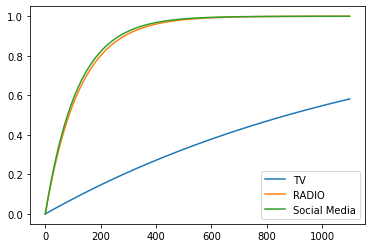

In [ ]:
## Saturation Effects
## Without Selecting the Dummy variables
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.plot(range(0,1100),y_axis_TV, label='TV')
plt.plot(range(0,1100),y_axis_radio, label='RADIO')
plt.plot(range(0,1100),y_axis_Social_Media, label='Social Media')

plt.legend()
plt.show()


{0: 100}

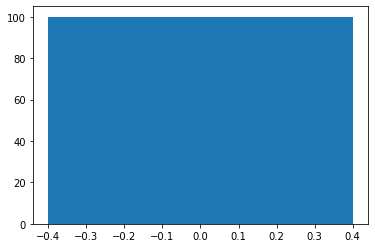

In [ ]:
## Carryover Effects
tv_carry_week = int(data_addstock._get_value('adstock__tv_pipe__carryover__length', 'Value'))
w=100
tv_carry_strength = data_addstock._get_value('adstock__tv_pipe__carryover__strength', 'Value')
val={0:100}
for i in range(1,tv_carry_week+1):
  val[i] = w*tv_carry_strength
  w=w*tv_carry_strength

week_no = list(val.keys())
values = list(val.values())
plt.bar(week_no, values)
val

### Now we are going to apply different models to find the best model. 

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
scaler = StandardScaler()                       ## Q: why standardScaler? because of extreme values like outliers?
X_train = scaler.fit_transform(X_train)         ##  first fit the X_train and then transform it to standardscaler 
X_test = scaler.transform(X_test)               ##  just transform the X_test(without fit)

In [ ]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "LinearSVR": LinearSVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse', 'rmse_cv'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    scores = cross_val_score(model, 
                             X_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred))),
           'rmse_cv': round(np.mean(np.sqrt(-scores)))
    }

    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
[05:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), OrthogonalMatchingPursuit())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fr

In [ ]:
df_models.head(20).sort_values(by='rmse_cv', ascending=True)

,model,run_time,rmse,rmse_cv
0,XGBRegressor,0.02,34,34
15,BayesianRidge,0.0,34,34
14,ARDRegression,0.0,34,34
12,HuberRegressor,0.0,34,34
10,Lars,0.0,34,34
9,Ridge,0.0,34,34
8,LinearRegression,0.0,34,34
17,OrthogonalMatchingPursuit,0.0,35,34
1,RandomForestRegressor,0.15,37,35
13,PassiveAggressiveRegressor,0.0,34,37


In [ ]:
regressor = XGBRegressor()
model = regressor.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

[05:52:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([234.95001, 351.5943 , 316.82605, ..., 402.68314, 311.43942,
       355.34494], dtype=float32)

In [ ]:
## XGBRegressor Model Accuracy
model.score(X_train,y_train) 

0.9162184567388044

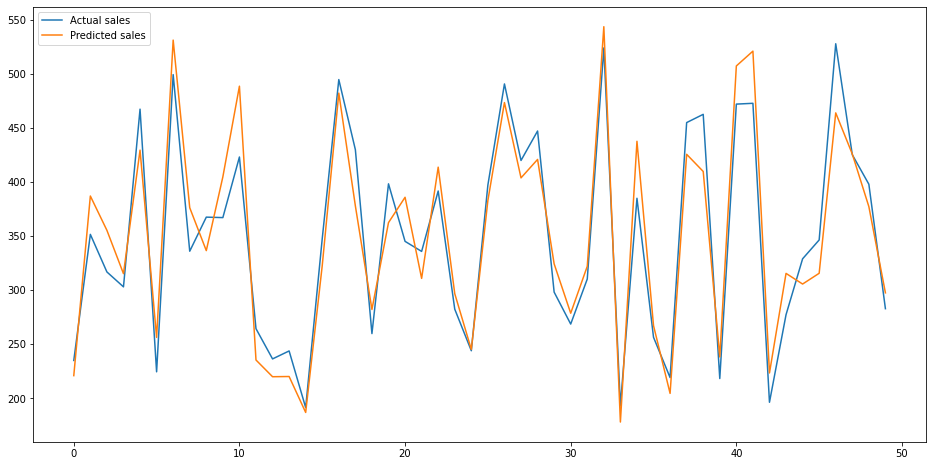

In [ ]:
test = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['Date'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])

In [ ]:
## Optimization
### Using Docplex to implement solver in python
!pip install docplex
!pip install cplex
from docplex.mp.model import Model 

m = Model(name='Optimization_for_MMM')

# Variables
TV = m.integer_var(name='TV')
Radio = m.integer_var(name='Radio')
SM = m.integer_var(name='Social_Media')

# Constraints
## On Tv
TV_non_neg = m.add_constraint(TV >= 0)

## On SM
SM_Min = m.add_constraint(SM >= 100)
SM_Max = m.add_constraint(SM <= 300)
SM_non_neg = m.add_constraint(SM >= 0)

## On Radio
Radio_Min = m.add_constraint(Radio >= 150)
Radio_Max = m.add_constraint(Radio <= 300)
Radio_non_neg = m.add_constraint(Radio >= 0)

# Constraints on Total ad spend
Total_budget_max = m.add_constraint(m.sum([TV + Radio + SM]) <= 1000)

# Coefficient
TV_coef = 3.3616934                             ## coeffs of OLS
Radio_coef = 1.32572795                          
                                             
SM_coef = 1.76633682
intercept = 129.19858367985867

# Optimized Budget
m.maximize(TV*TV_coef + Radio*Radio_coef + SM*SM_coef + intercept)

sol = m.solve()

sol.display()

solution for: Optimization_for_MMM
objective: 3025.962
TV = 750
Radio = 150
Social_Media = 100
